In [4]:
# set path
rootdir = '/Users/rj/'
import os,sys
# append the path where your scripts are
sys.path.append(rootdir+"soft/python/") 
# import your own packages
from universal import *
plot_conf()

# params = {'text.latex.preamble': [r'\usepackage{siunitx}', 
#    r'\usepackage{sfmath}', r'\sisetup{detect-family = true}',4
#    r'\usepackage{amsmath}']}   
# plt.rcParams.update(params)   

workdir = '/Users/rj/Fellow-CERN/SAD/ATF2/OctBBA/UltralowOptics'
os.chdir(workdir)
import scipy;
from scipy.integrate import quad, dblquad
import ipywidgets

from matplotlib.ticker import AutoMinorLocator

# Reconstruct SVD
from numpy import array
from numpy import diag
from numpy import dot
from scipy.linalg import svd

In [78]:
dat0 = loadtxt('./data/Orb_allBPM_x.dat')
dat1 = loadtxt('./data/Test_jitter.dat', usecols = (1, 2, 3))

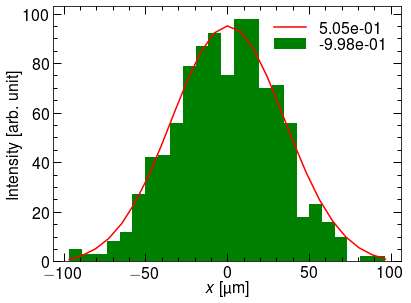

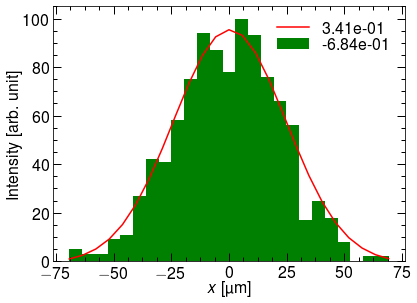

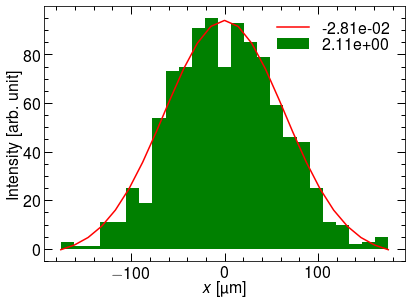

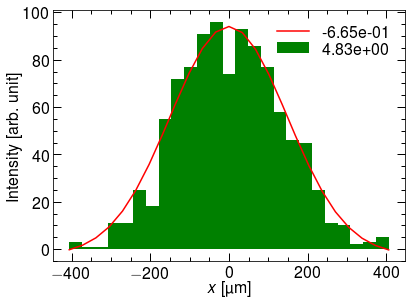

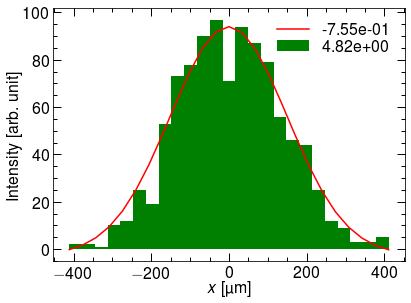

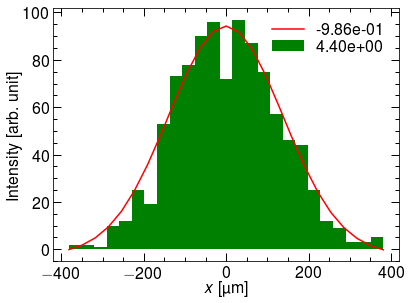

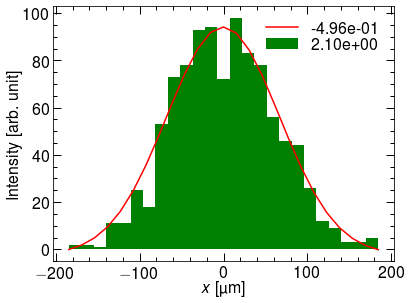

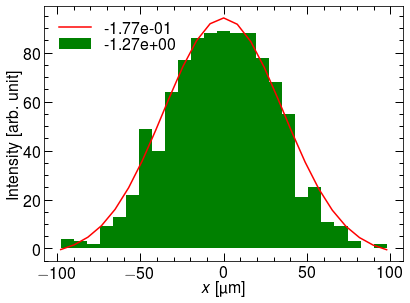

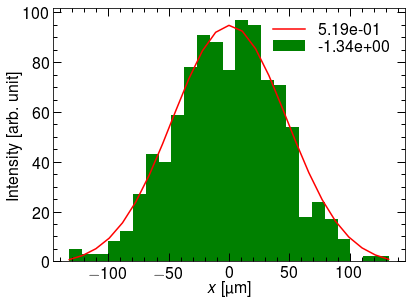

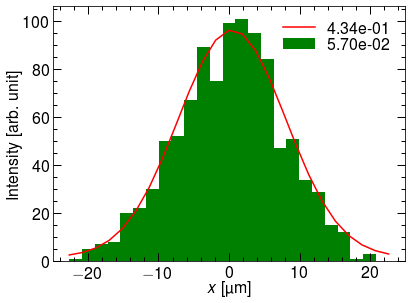

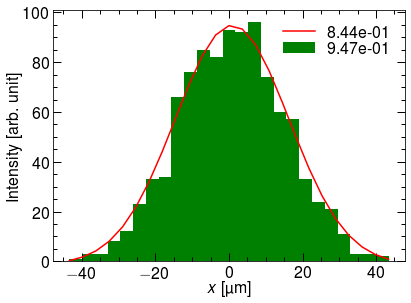

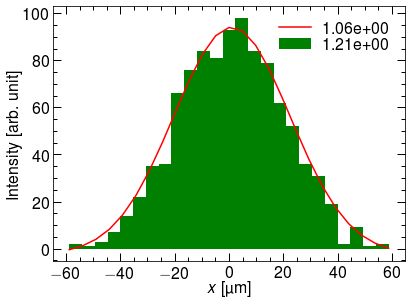

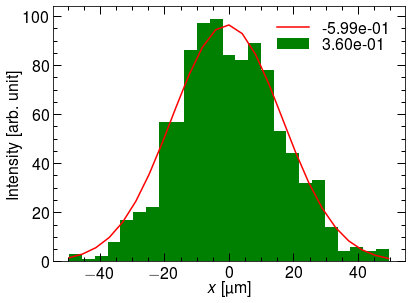

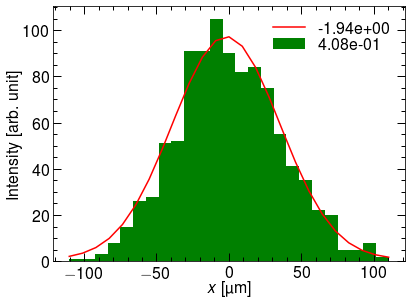

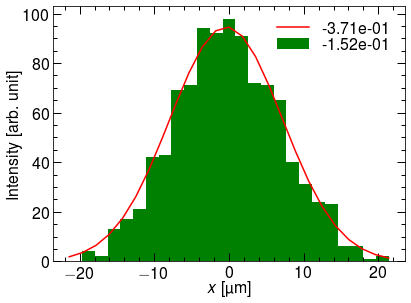

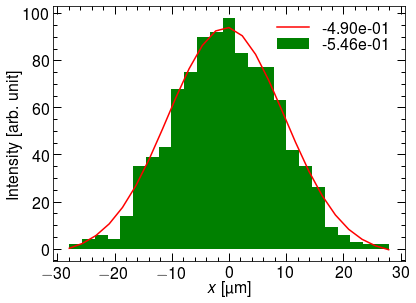

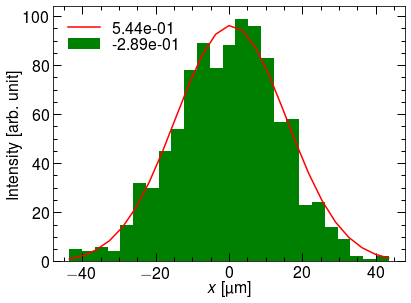

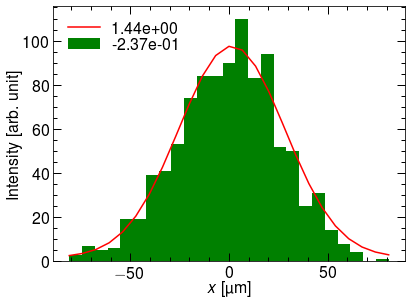

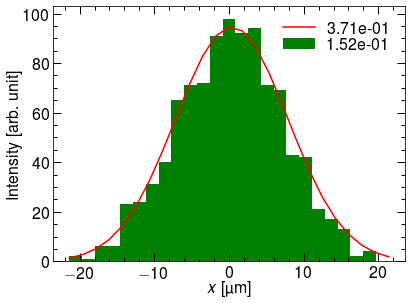

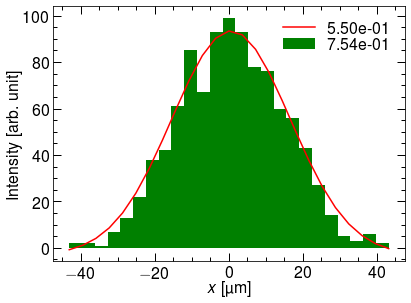

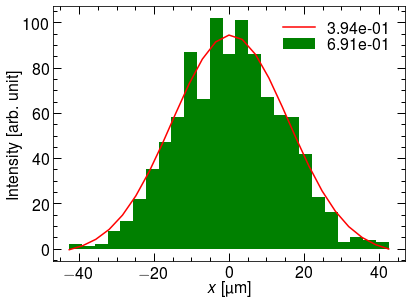

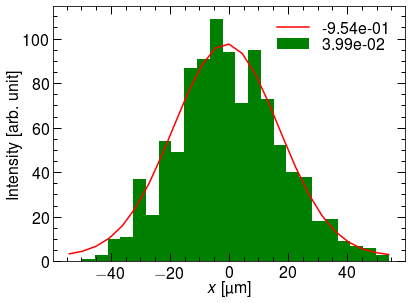

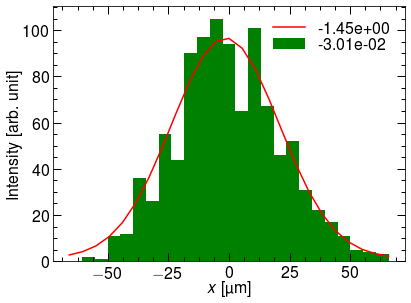

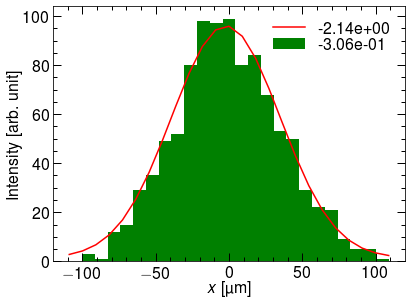

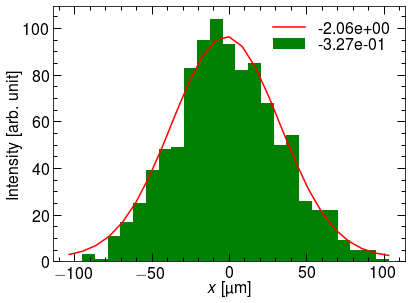

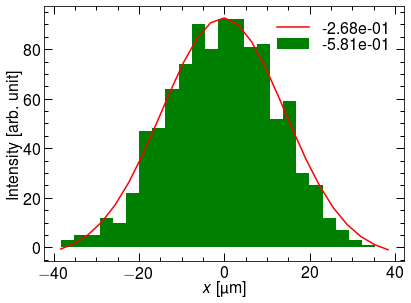

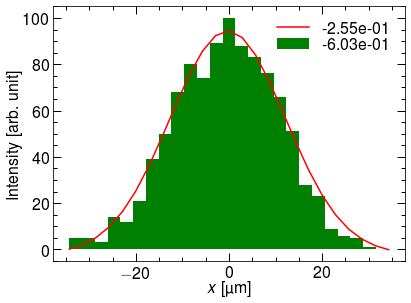

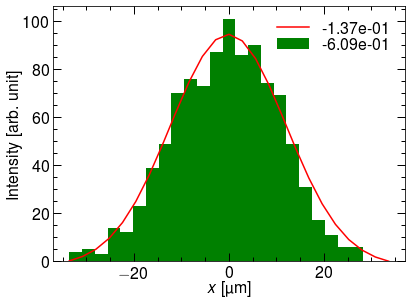

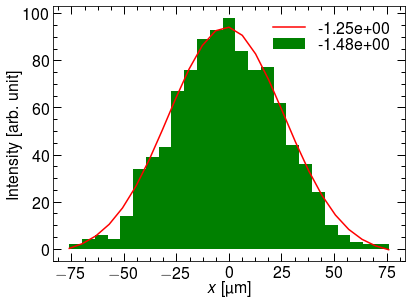

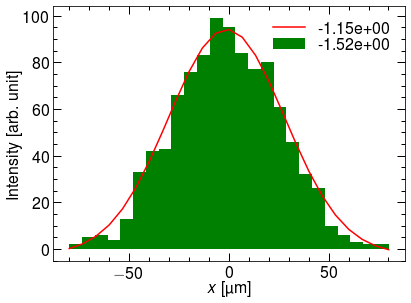

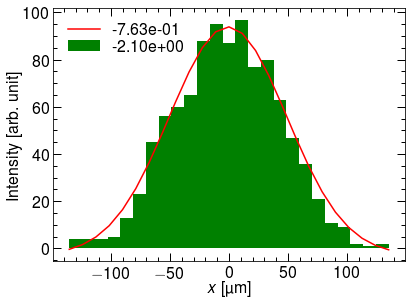

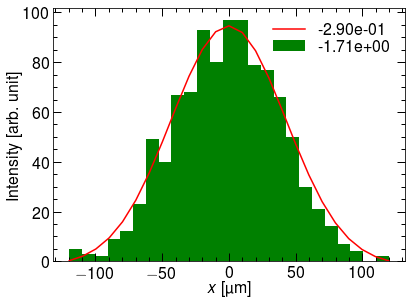

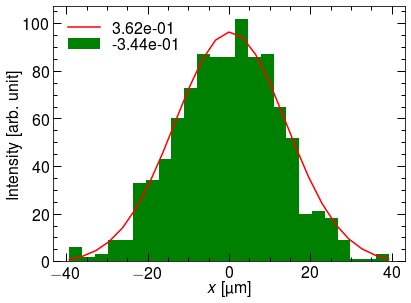

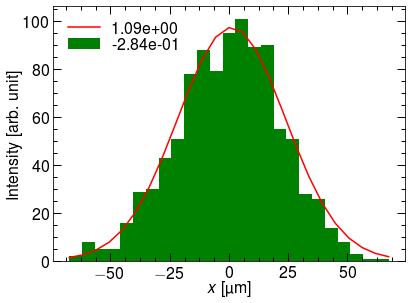

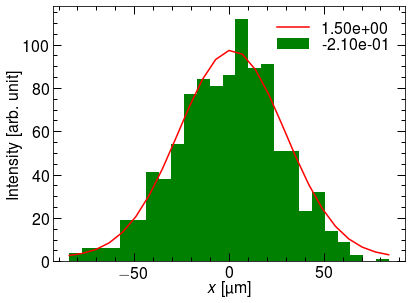

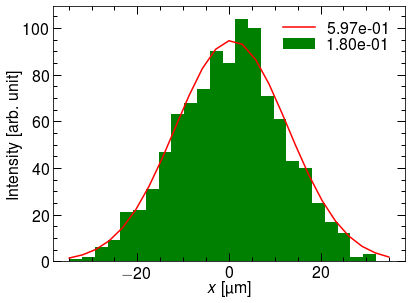

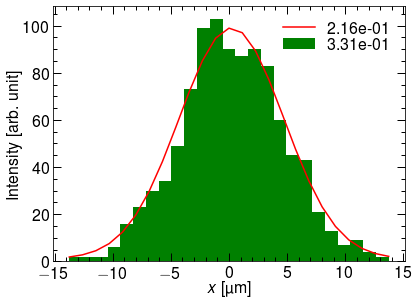

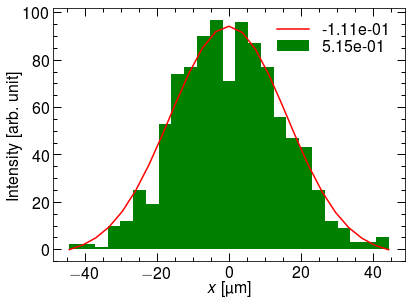

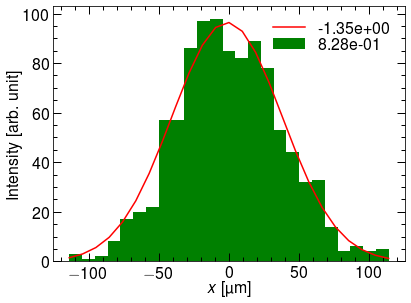

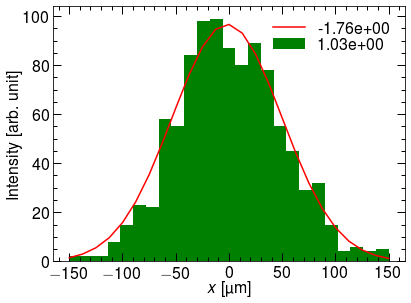

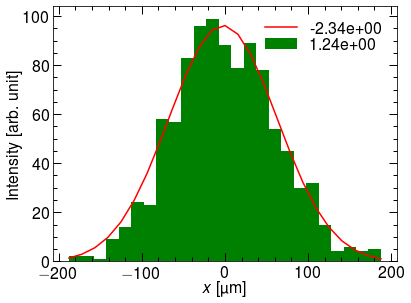

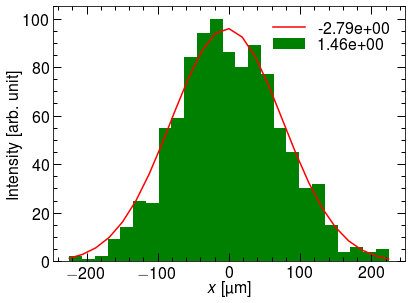

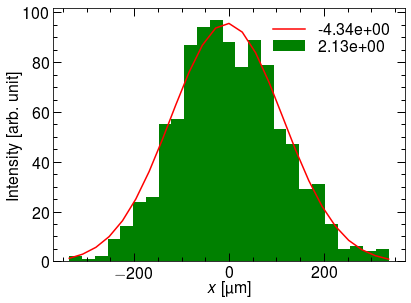

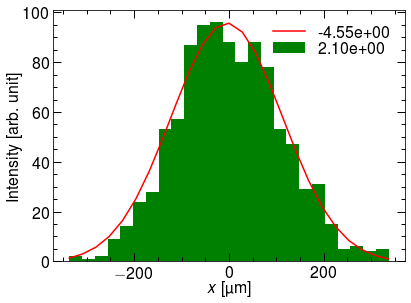

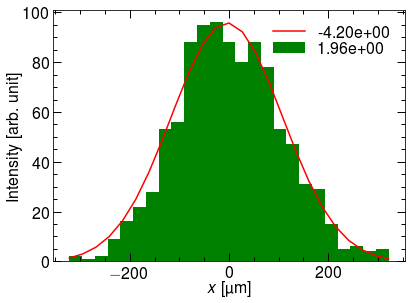

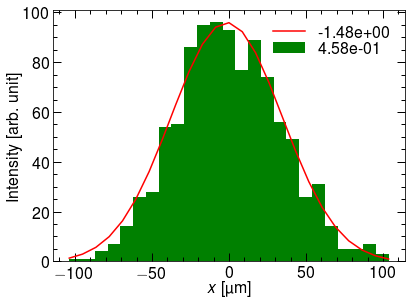

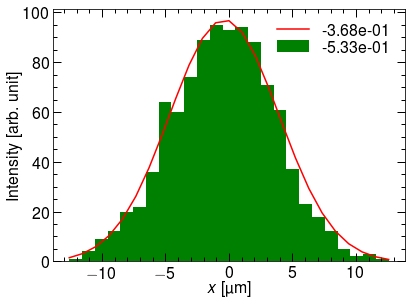

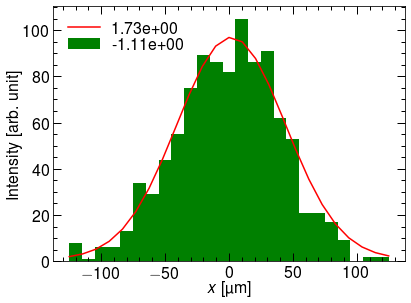

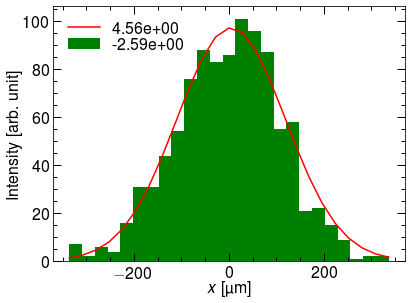

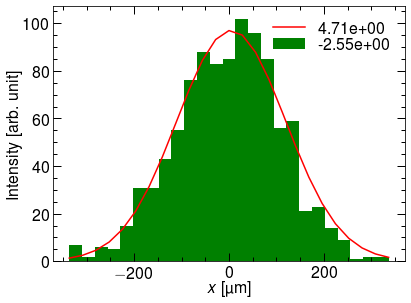

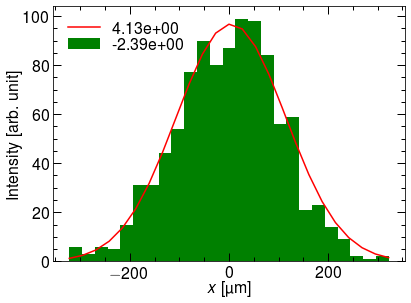

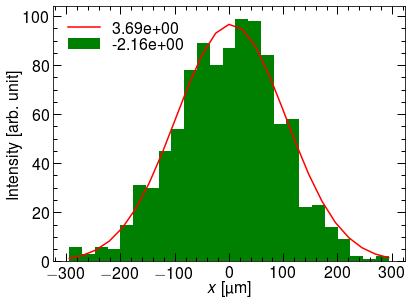

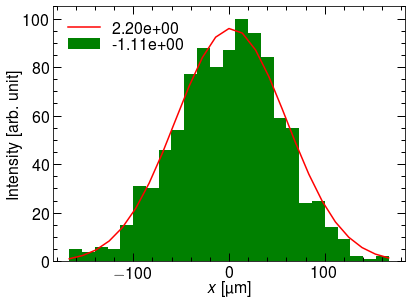

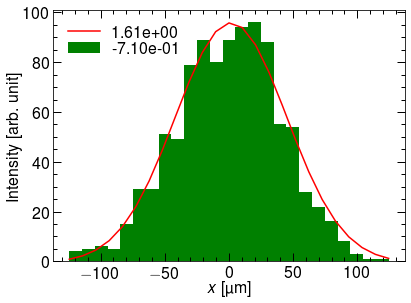

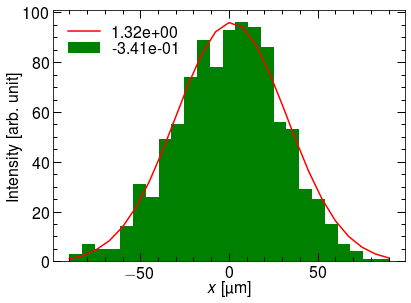

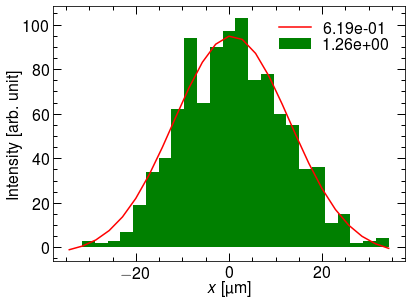

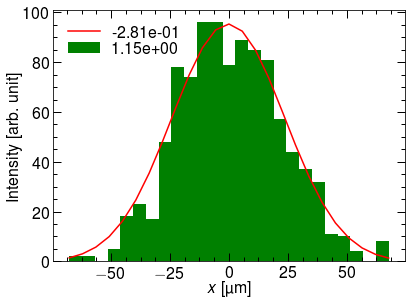

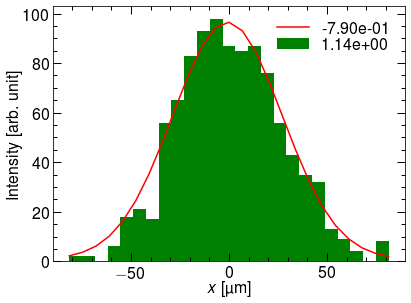

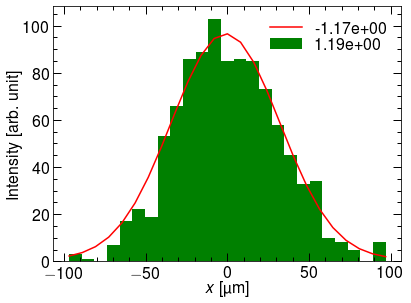

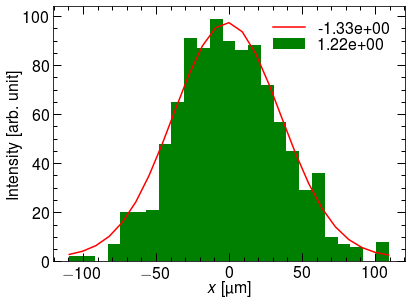

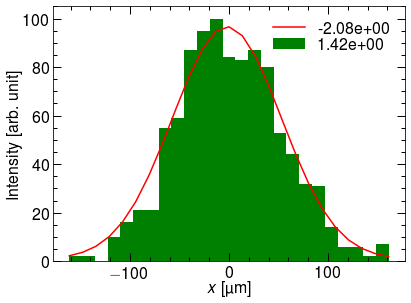

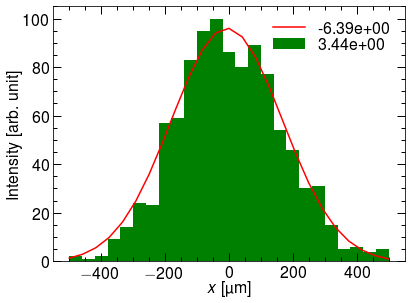

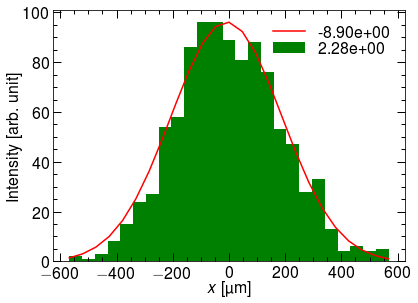

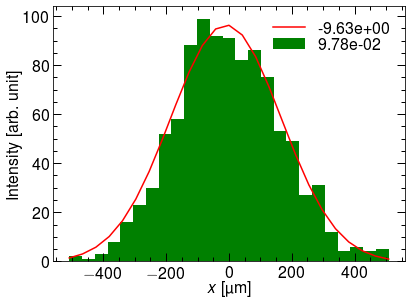

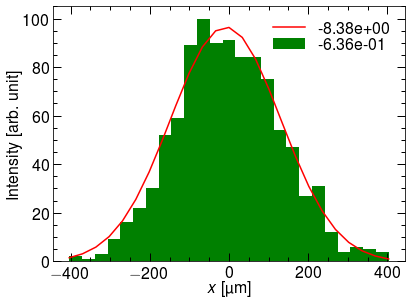

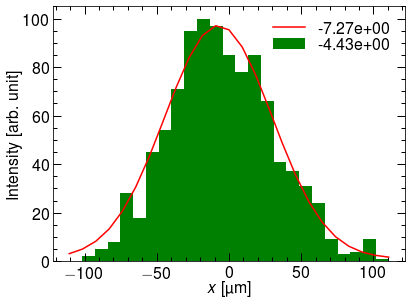

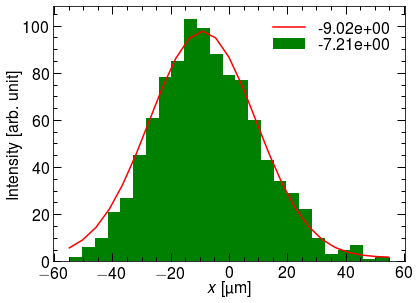

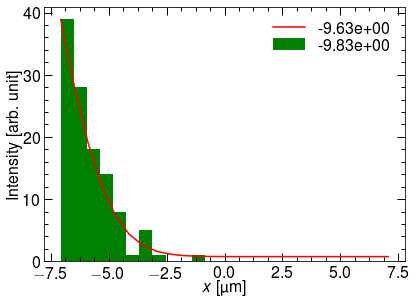

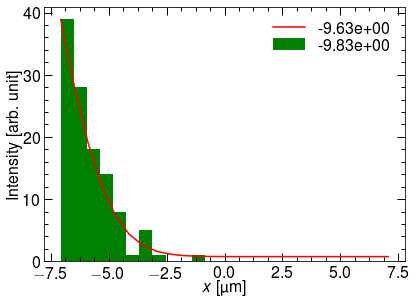

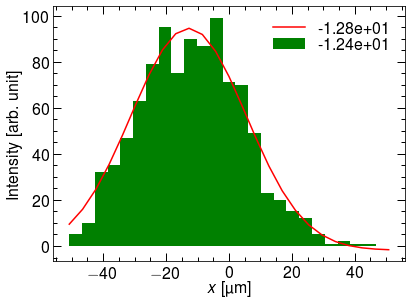

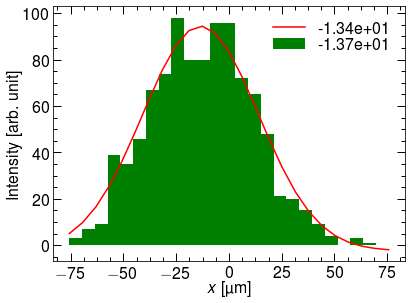

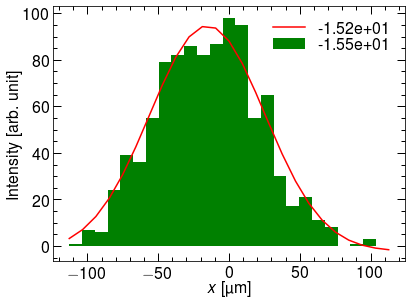

In [79]:
orb_mean =[]
orb_fit = []
fitfunc  = lambda p, x: p[0]*exp(-0.5*((x-p[1])/p[2])**2)+p[3]

for i in range(5, len(dat0)):
    signal = dat0[i]*1e6
    sig0 = std(signal)
    nbin = 25

    x1 = np.linspace(-3*sig0, 3*sig0, nbin)
    hist_x1 = histogram1d(signal, bins= nbin, range=(-3*sig0, 3*sig0)) 
    fitx = fitGaussian1D(x1, hist_x1, max(hist_x1), mean(signal), sig0*1.1, 0.1, 0.01)
    
    orb_mean = append(orb_mean, mean(signal))
    orb_fit = append(orb_fit, fitx[1])
    
    fig = plt.figure()
    plt.hist(signal, bins=nbin, range=(-3*sig0, 3*sig0), color='g', label=r'%.2e'%mean(signal))
    plt.plot(x1, fitfunc(fitx, x1), label=r'%.2e'%fitx[1])
    plt.xlabel(r'$x$ [\si{\um}]')
    plt.ylabel(r'Intensity [arb. unit]')
    plt.legend(loc = 'best', frameon = False)

    fig.tight_layout()
    plt.show()
    

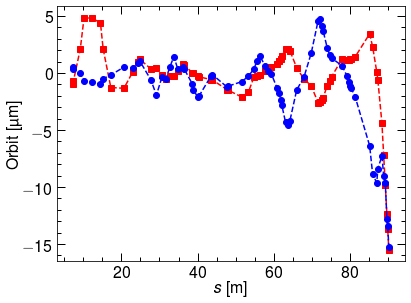

In [90]:
s = transpose(dat1)[0][1:]
fig = plt.figure()
plt.plot(s, orb_mean, 's--')
plt.plot(s, orb_fit, 'o--')
plt.xlabel(r'$s$ [m]')
plt.ylabel(r'Orbit [\si{\um}]')

fig.tight_layout()
plt.show()

In [81]:
3167/(3.356*1.282)

736.1021496878946